In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("WHO_time_series.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31876 entries, 0 to 31875
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      31876 non-null  object
 1   Country            31876 non-null  object
 2   New_cases          31876 non-null  int64 
 3   Cumulative_cases   31876 non-null  int64 
 4   New_deaths         31876 non-null  int64 
 5   Cumulative_deaths  31876 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ MB


In [4]:
data.shape

(31876, 6)

In [5]:
data.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,China,1,1,0,0
1,2020-01-05,China,0,1,0,0
2,2020-01-06,China,3,4,0,0
3,2020-01-07,China,0,4,0,0
4,2020-01-08,China,0,4,0,0


In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.columns

Index(['date_reported', 'country', 'new_cases', 'cumulative_cases',
       'new_deaths', 'cumulative_deaths'],
      dtype='object')

In [8]:
data["date_reported"] = pd.to_datetime(data["date_reported"])

In [9]:
data.dtypes

date_reported        datetime64[ns]
country                      object
new_cases                     int64
cumulative_cases              int64
new_deaths                    int64
cumulative_deaths             int64
dtype: object

In [10]:
data["country"].value_counts()

China                        210
Thailand                     201
Japan                        200
Republic of Korea            195
United States of America     194
                            ... 
Saint Pierre and Miquelon    115
Yemen                        113
Tajikistan                    92
Comoros                       92
Lesotho                       79
Name: country, Length: 216, dtype: int64

In [11]:
italy = data[data["country"] == "Italy"]

In [12]:
italy.head()

,date_reported,country,new_cases,cumulative_cases,new_deaths,cumulative_deaths
123,2020-01-29,Italy,6,6,0,0
144,2020-01-30,Italy,0,6,0,0
158,2020-01-31,Italy,0,6,0,0
187,2020-02-01,Italy,0,6,0,0
215,2020-02-02,Italy,0,6,0,0


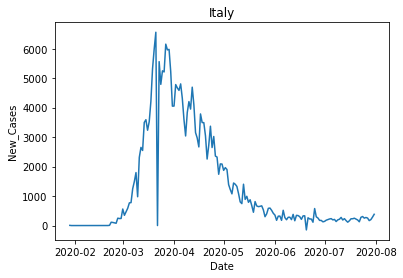

In [13]:
plt.plot(italy["date_reported"],italy["new_cases"])
plt.xlabel("Date")
plt.ylabel("New_Cases")
plt.title("Italy")
plt.show()

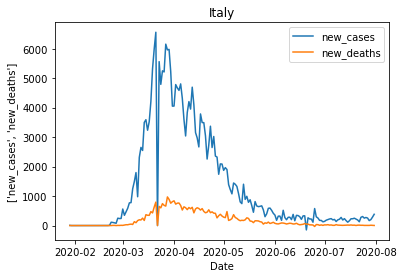

In [14]:
plt.plot(italy["date_reported"],italy["new_cases"],label = "new_cases")
plt.plot(italy["date_reported"],italy["new_deaths"],label = "new_deaths")
plt.xlabel("Date")
plt.ylabel(["new_cases","new_deaths"])
plt.title("Italy")
plt.legend()
plt.show()

In [15]:
def plot(country_name):
    country = data[data["country"] == country_name]
    plt.plot(country["date_reported"],country["cumulative_cases"],label = "cumulative_cases")
    plt.plot(country["date_reported"],country["cumulative_deaths"],label= "cumulative_deaths")
    plt.xlabel("Date")
    plt.ylabel(["cumulative_cases","cumulative_deaths"])
    plt.title(f'{country}')
    plt.legend()
    plt.show()

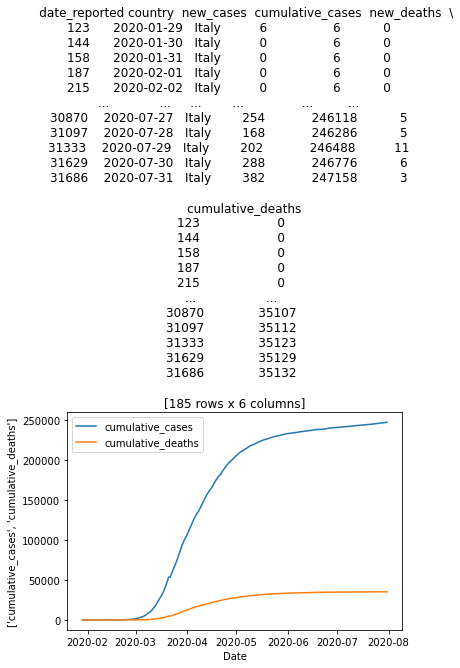

In [16]:
plot("Italy")

In [17]:
def plot_cases(country_name):
    df = data[data["country"] == country_name]
    plt.plot(df["date_reported"], df["cumulative_cases"],label = "cases" )
    plt.plot(df["date_reported"], df["cumulative_deaths"],label = "deaths")
    plt.xlabel("Date")
    plt.ylabel("Number of Cases")
    plt.title(f"{country_name} Cumulative Reported Cases")
    plt.legend()
    plt.show()

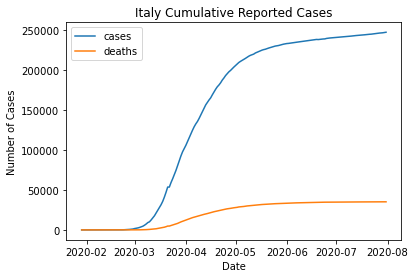

In [18]:
plot_cases("Italy")

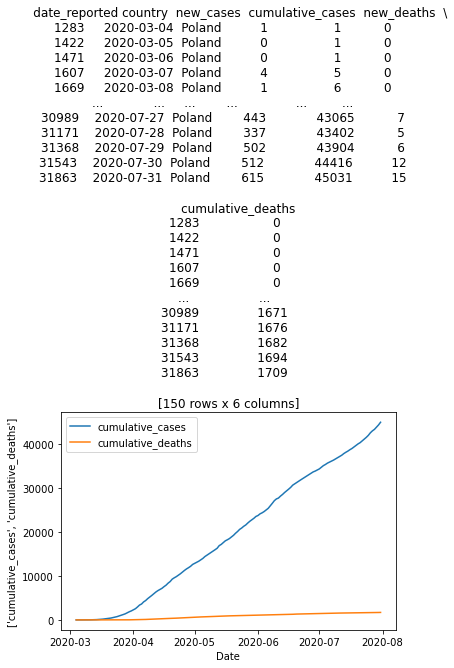

In [20]:
plot("Poland")

## Co-Relation

In [22]:
data.cumulative_cases.corr(data.cumulative_deaths)

0.9066306613225955